# The Mathematics of Neural Networks
By: Keith D. Smith <br>
March 23, 2024

# Tensors - The Language of Neural Networks
Generally, all machine learning models, including neural networks, utilize tensors.  Tensors are generalized vectors and martices that can expand to any number of dimensions.  


### Scalars
Scalars are zero dimensional tensors.  They contain a single number.  

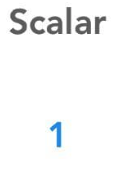

### Vectors
Vectors are a one dimensional tensor called an array.  Vectors consist of a single axis as seen below: 

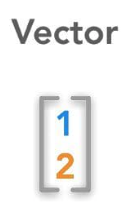

Vectors can be represented programitically as shown below.

In [4]:
import numpy as np

x = np.array([3, 4, 8, 7, 12])
print(x)
print(x.dtype) 

[ 3  4  8  7 12]
int64


As seen in the output, this vector is 1x5.  In other words, it can be considered a five dimensional vector which should not be confused with a multi-dimensional tensor.  This vector has five dimensions along its single axis whereas a 5D tensor has five axes.  Therefore, dimensionality can mean the number of elements along a single axis or the number of axes as in a tensor. Technically, tensors are referred to as a tensor of rank x where x denotes the number of axes in the tensor.

### Matrices
Matrices are two dimensional tensors.  Accordingly, matrices always consist of two axes.  In the data world, these axes are commonly referred to as columns and rows.  Matrices are rectangular as demonstrated below:

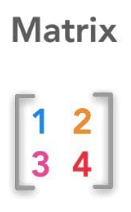

Matrices Can be represented programmatically as shown below:

In [6]:
x = np.zeros((2, 2))
print(x)

[[0. 0.]
 [0. 0.]]


### Higher Dimensional Tensors
Tensors of higher order can be visualized as stacked matrices.  For instance, a 3-dimensional tensor can be visualized as a collection of matrices stacked on top of each other along a new axis. Each matrix corresponds to a slice of the tensor along the additional axis. Similarly, tensors of higher order can be visualized in a similar fashion, with each new dimension representing an additional axis along which matrices are stacked. This visualization technique helps in understanding and working with higher-dimensional tensors, especially in contexts like deep learning where tensors are prevalent.

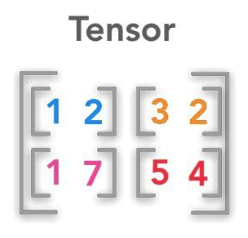

In [7]:
x = np.zeros((2, 3, 2))
print(x)
print(x.shape)

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]
(2, 3, 2)


Accordingly, tensors are defined by three key attribute: <br>

* The Number of Axes (Tensor of Rank 2)
* Shape (2x3x2)
* Data Type

An example can be drawn from the MNIST dataset.

In [9]:
%%capture
import tensorflow as tf
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The number of axes can be displayed as follows:

In [11]:
num_dimensions = train_images.ndim
print("Number of Dimensions:", num_dimensions)

Number of Dimensions: 3


The shape can be examined as follows:

In [12]:
shape = train_images.shape
print("Shape of the Tensor:", shape)

Shape of the Tensor: (60000, 28, 28)


The Data Type can aslo be examined as follows: 

In [13]:
dtype = train_images.dtype
print("Data type of the tensor:", dtype)

Data type of the tensor: uint8


Accordingly, the tensor is of rank 3, an array of 60,000 matrices that are 28x28, and consists of integers of 8 bits.  In this dataset, each matrix is a greyscale image and can be plotted as follows:

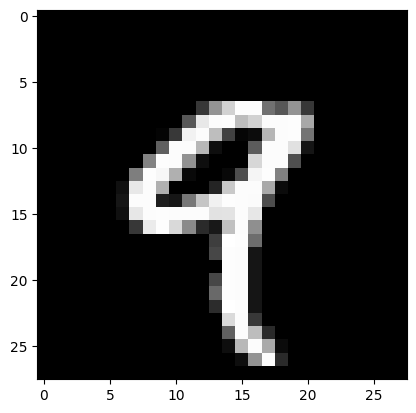

In [14]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap='gray', vmin=0, vmax=255)
plt.show()

# The Mathematics of Neural Networks

Knowing linear algebra is necessary when developing neural networks.  Basic neural networks consist of perceptrons.  Inputs and model weights can be described as vectors and matrices and the calculations are analogous to dot products, matrix-vector multiplication, and matrix multiplications. When optimizing neural networks, calculus is utilized to find the minimum of the loss function.

## Linear Algrebra

In the context of perceptrons, which are the building blocks of neural networks, linear algebra concepts such as the dot product and matrix multiplication play crucial roles. The dot product operation is used to compute the weighted sum of inputs and weights, where each input is multiplied by its corresponding weight, and the results are summed up. This operation determines the strength of the connection between inputs and the perceptron, influencing the perceptron's response. Matrix multiplication extends this concept to multiple inputs and weights, allowing for efficient computation of the weighted sums for multiple perceptrons simultaneously. It encapsulates the linear transformations applied by the perceptrons to the input data, enabling complex decision boundaries to be learned through the combination of multiple perceptrons. Thus, linear algebra provides the mathematical framework for representing and manipulating the connections and transformations within perceptrons, facilitating their ability to learn and make decisions from input data.

### The Dot Product

The dot product is a fundamental operation in linear algebra that takes two vectors and returns a scalar value. It's also known as the inner product or scalar product. Mathematically, the dot product of two vectors **a** and **b** of the same size _n_ is defined as:

The dot product of two vectors $$( \mathbf{a} )$$ and $$( \mathbf{b} )$$ is calculated using the formula:

$$
\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i \cdot b_i = a_1 \cdot b_1 + a_2 \cdot b_2 + \cdots + a_n \cdot b_n
$$

Where $$( a_i )$$ and $$( b_i )$$ are the components of vectors $$( \mathbf{a} )$$ and $$( \mathbf{b} )$$ respectively. This formula computes the sum of the products of corresponding elements of the two vectors, resulting in a scalar value.

In the context of neural networks, dot product multiplication arises when dealing with the weights and inputs of neurons. In a neural network layer, each neuron has its own set of weights which are multiplied by the input values. The dot product operation is used to compute the weighted sum of the inputs.  Below is an example of dot product multiplication:

In [24]:
# Define two vectors
vector1 = [2, 3, 4]
vector2 = [0.5, 0.8, -0.3]

# Calculate dot product
dot_product = 0
for i in range(len(vector1)):
    dot_product += vector1[i] * vector2[i]

print("Dot product:", dot_product)

Dot product: 2.2


The dot product can also be calculated via a Numpy function as below:

In [25]:
# Define two vectors as NumPy arrays
vector1 = np.array([2, 3, 4])
vector2 = np.array([0.5, 0.8, -0.3])

# Calculate dot product using NumPy's dot function
dot_product = np.dot(vector1, vector2)

print("Dot product:", dot_product)

Dot product: 2.2


In the context of tensors, the dot product operation can be extended to higher-dimensional arrays. The dot product between two tensors is calculated by summing the element-wise products along specified axes.

Algorithmically, the dot product between two tensors can be computed by performing element-wise multiplication between corresponding elements of the tensors and then summing the results along specified axes.

Here's an algorithmic implementation of the dot product between two tensors:

In [26]:
#Define two tensors
tensor1 = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
tensor2 = np.array([[[0.1, 0.2], [0.3, 0.4]], [[0.5, 0.6], [0.7, 0.8]]])

# Algorithmic implementation of dot product between two tensors
def tensor_dot_product(tensor1, tensor2, axes=None):
    # Perform element-wise multiplication between corresponding elements of the tensors
    element_wise_product = tensor1 * tensor2
    
    # Sum the results along specified axes
    dot_product = np.sum(element_wise_product, axis=axes)
    
    return dot_product

print("The Dot Product of Tensors 1 & 2:", tensor_dot_product(tensor1, tensor2))

The Dot Product of Tensors 1 & 2: 20.4


Alternatively, in NumPy, you can use the einsum function to compute the dot product between two tensors. Here's how you can use it:

In [27]:
# Compute dot product using NumPy's einsum function
dot_product = np.einsum('ijk,ijk->', tensor1, tensor2)

# Print the dot product
print("The Dot Product of Tensors 1 & 2:", dot_product)

The Dot Product of Tensors 1 & 2: 20.4


### Tensor-Vector Multiplication
Tensor-vector multiplication within the context of neural networks involves multiplying a tensor by a vector. In neural networks, this operation is commonly used to transform input data or the activations of neurons in one layer by weights associated with connections to the next layer.  Mathematically, if we have a tensor **A** of shape _(N1, N2, ...,Nk)_ and a vector **v** of length _m_, the tensor-vector multiplication results in a new tensor **B** of shape _(N1, N2, ...Nk-1, m)_ where each element of the new tensor **B** is obtained by multiplying the corresponding element of **A** by the corresponding element of **v**.  Below is an algorithmic implementation of Tensor-vector multiplication:

In [33]:
# Define a tensor and a vector as NumPy arrays
tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
vector = np.array([0.5, 0.8])

def tensor_vector_multiply(tensor, vector):
    tensor_shape = tensor.shape
    new_tensor = np.zeros_like(tensor)
    
    for i in range(tensor_shape[0]):
        for j in range(tensor_shape[1]):
            for k in range(tensor_shape[2]):
                new_tensor[i, j, k] = tensor[i, j, k] * vector[k]
    
    return new_tensor

print("Result of tensor-vector multiplication:") 
print(tensor_vector_multiply(tensor, vector))

Result of tensor-vector multiplication:
[[[0 1]
  [1 3]]

 [[2 4]
  [3 6]]]


### Tensor-Tensor Multiplication
Tensor-tensor multiplication is a fundamental operation in linear algebra, commonly utilized in neural networks. It involves multiplying two tensors to produce a new tensor. The operation begins with the input tensors, ensuring compatibility by matching the last dimension of the first tensor with the second-to-last dimension of the second tensor. The resulting tensor's shape is determined by the outer dimensions of the input tensors, with element-wise multiplication and summation performed iteratively over corresponding elements. This operation is essential for tasks like matrix multiplication between weight matrices and input data in neural network computations.  Algorithmically, tensor-tensor multiplication can be implemented as follows:

In [47]:
import numpy as np

def tensor_multiply(tensor1, tensor2):
    # Get the shapes of the tensor matrices
    shape1 = tensor1.shape
    shape2 = tensor2.shape
    
    # Check if the shapes are compatible for multiplication
    if shape1[1] != shape2[0]:
        raise ValueError("Incompatible shapes for tensor multiplication")
    
    # Determine the shape of the result tensor
    result_shape = (shape1[0], shape2[1])
    
    # Initialize an empty result matrix with zeros
    result_tensor = np.zeros(result_shape)
    
    # Perform tensor multiplication
    for i in range(shape1[0]):
        for j in range(shape2[1]):
            for k in range(shape1[1]):
                result_tensor[i, j] += tensor1[i, k] * tensor2[k, j]
    
    return result_tensor

# Define example matrices
tensor1 = np.array([[1, 2],
                     [3, 4]])

tensor2 = np.array([[1, 0],
                     [0, 1]])

# Perform tensor multiplication
result = tensor_multiply(tensor1, tensor2)

# Print the result
print("Result of tensor multiplication:")
print(result)


Result of tensor multiplication:
[[1. 2.]
 [3. 4.]]


## Calculus
### The Gradient

Certainly! In neural networks, calculus, particularly the concept of gradients, plays a crucial role in the process of training. The gradient represents the rate of change of a function with respect to its parameters. In the context of neural networks, we typically use gradient descent optimization algorithms to minimize a loss function by adjusting the parameters (weights and biases) of the network. To calculate the gradient, we use techniques such as the chain rule of calculus to compute the partial derivatives of the loss function with respect to each parameter. This process involves forward propagation to compute the output of the network, followed by backward propagation to compute the gradients recursively layer by layer. The gradients guide the optimization process by indicating the direction in which the parameters should be adjusted to minimize the loss. Here's an algorithmic code example demonstrating how to calculate the gradient of a simple function:

In [50]:
import numpy as np

# Define a simple function
def simple_function(x):
    return np.sum(x**2) + 2*np.sum(x) + 1

# Gradient calculation using numerical approximation
def calculate_gradient(func, x):
    epsilon = 1e-6  # Small value for numerical stability
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus_epsilon = x.copy()
        x_plus_epsilon[i] += epsilon
        grad[i] = (func(x_plus_epsilon) - func(x)) / epsilon
    return grad

# Example usage
x = np.array([1.0, 2.0, 3.0])  # Initial input
grad_numerical = calculate_gradient(simple_function, x)
print("Numerical gradient:", grad_numerical)


Numerical gradient: [4.000001 6.000001 8.000001]


### Gradient Descent
Gradient Descent is a fundamental optimization algorithm widely employed in training neural networks. In the context of neural networks, the function being optimized is typically the loss function, which quantifies the difference between the predicted and actual outputs of the network. Given the complexity and high dimensionality of neural network models, analytical solutions for minimizing the loss function are often impractical. Gradient Descent addresses this challenge by iteratively adjusting the network's parameters in the direction that minimizes the loss. This adjustment is guided by the negative gradient of the loss function with respect to the network's parameters. By taking small steps proportional to the gradient and scaling them by a learning rate, Gradient Descent iteratively updates the parameters, aiming to converge towards the minimum of the loss function. This iterative process allows neural networks to learn complex patterns from data and improve their performance over time through training. Gradient descent is shown algorithmically below.

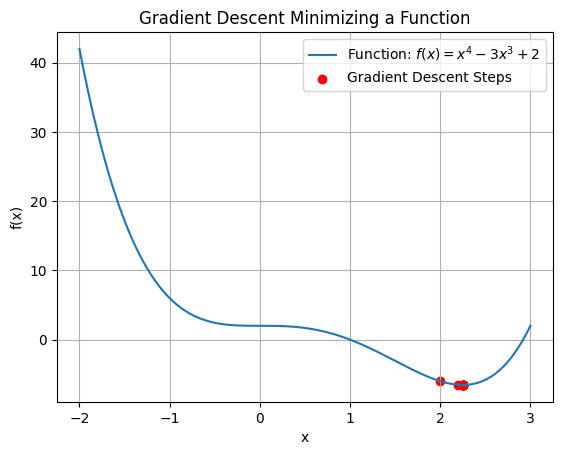

In [52]:
import matplotlib.pyplot as plt

# Define the function
def func(x):
    return x**4 - 3*x**3 + 2

# Define the derivative of the function
def func_derivative(x):
    return 4*x**3 - 9*x**2

# Gradient Descent function
def gradient_descent(initial_x, learning_rate, num_iterations):
    x_values = [initial_x]
    for _ in range(num_iterations):
        gradient = func_derivative(x_values[-1])
        new_x = x_values[-1] - learning_rate * gradient
        x_values.append(new_x)
    return x_values

# Define parameters
initial_x = 2  # Initial guess
learning_rate = 0.05  # Learning rate
num_iterations = 10  # Number of iterations

# Perform Gradient Descent
x_values = gradient_descent(initial_x, learning_rate, num_iterations)

# Plot the function and steps taken by Gradient Descent
x = np.linspace(-2, 3, 400)
plt.plot(x, func(x), label='Function: $f(x) = x^4 - 3x^3 + 2$')
plt.scatter(x_values, func(np.array(x_values)), color='red', label='Gradient Descent Steps')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Minimizing a Function')
plt.legend()
plt.grid(True)
plt.show()

The process is demonstrated below as the algorithm moves towards the mimumum of the function:

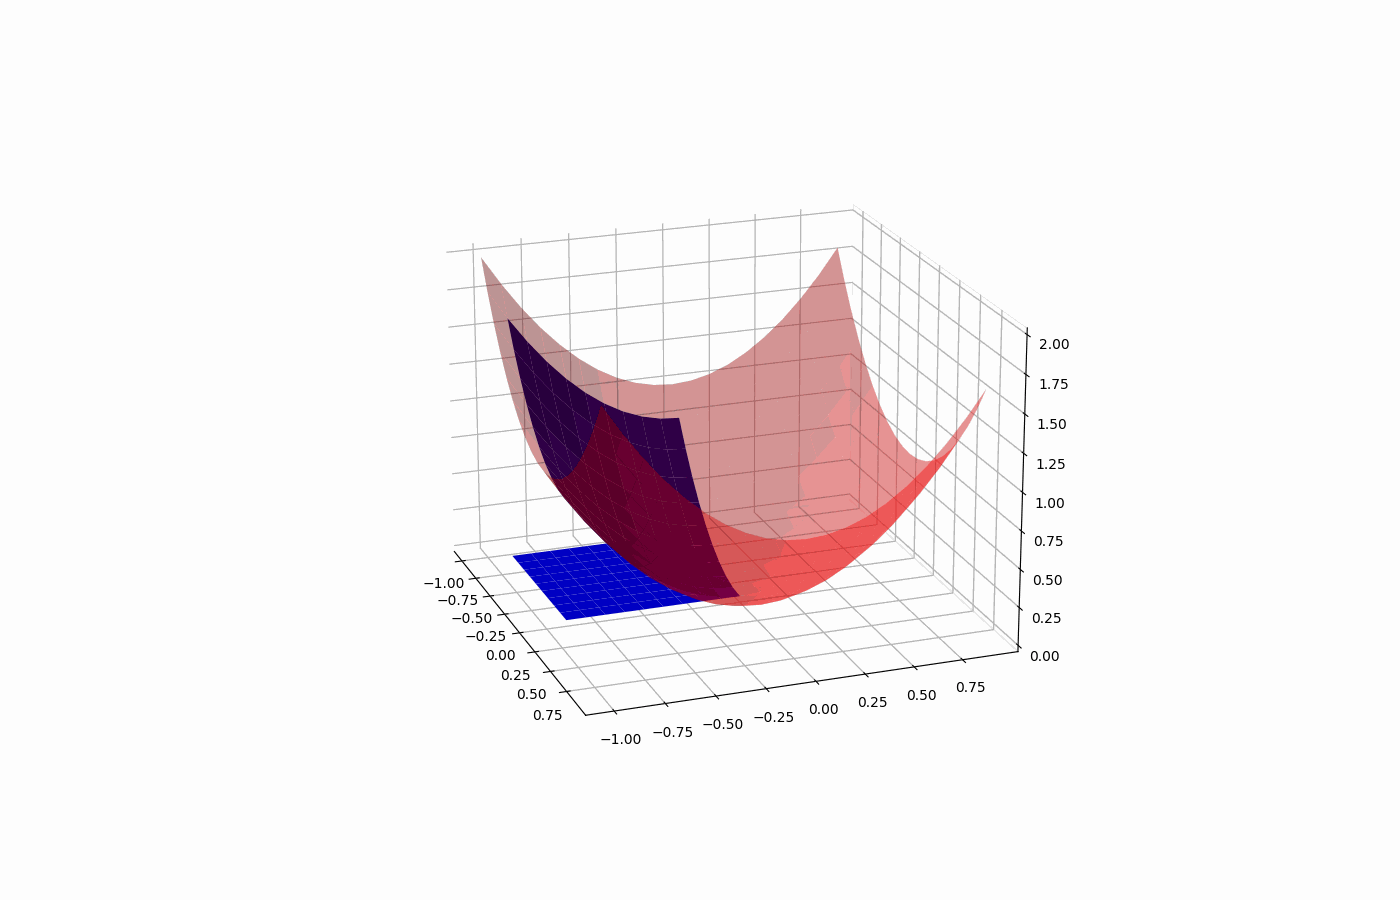

### Backpropagation
Backpropagation is a key algorithm in training artificial neural networks, enabling them to learn from data by iteratively adjusting the network's parameters to minimize a given loss function. The name "backpropagation" stems from its backward flow of gradients through the network layers to update the weights.

The algorithm comprises two main phases: forward pass and backward pass. During the forward pass, the input data is propagated through the network, layer by layer, to compute the output predictions. These predictions are then compared to the actual targets to compute the loss. In the backward pass, gradients of the loss with respect to each parameter in the network are computed recursively using the chain rule of calculus, starting from the output layer and propagating backward through the layers. These gradients indicate how much each parameter contributed to the error. Finally, the network parameters are updated in the opposite direction of the gradient using an optimization algorithm like Gradient Descent. 

The algorithm is defined below:
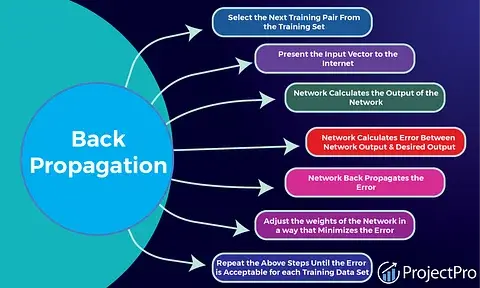

# A Complete Example - The Neural Network in Action

The cumulative mathematics of neural networks can be demonstrated in a simple example of training a neural network to classify points in a 2D space. We'll generate some synthetic data, define a simple neural network architecture, and use backpropagation to train the network.

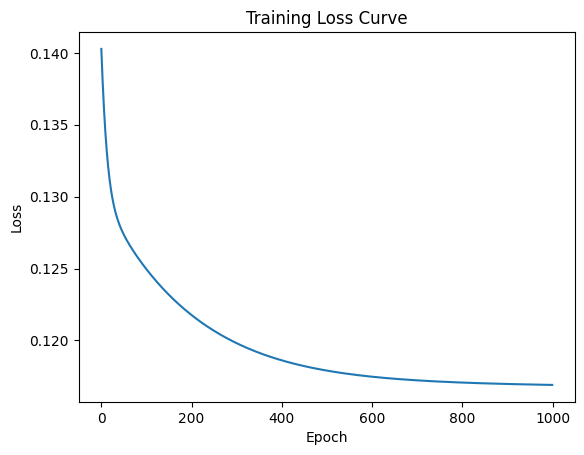

In [55]:
# Define the neural network architecture
input_size = 2
hidden_size = 3
output_size = 1

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the forward pass
def forward(X):
    global W1, b1, W2, b2
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)
    return y_pred, a1

# Define the loss function
def loss(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred) ** 2)

# Define the backward pass
def backward(X, y_true, y_pred, a1):
    global W1, b1, W2, b2
    grad_loss = (y_pred - y_true) / len(y_true)
    grad_W2 = np.dot(a1.T, grad_loss)
    grad_b2 = np.sum(grad_loss, axis=0)
    grad_a1 = np.dot(grad_loss, W2.T)
    grad_z1 = grad_a1 * a1 * (1 - a1)
    grad_W1 = np.dot(X.T, grad_z1)
    grad_b1 = np.sum(grad_z1, axis=0)
    return grad_W1, grad_b1, grad_W2, grad_b2

# Training parameters
epochs = 1000
lr = 0.1

# Generate synthetic data
X = np.random.randn(100, input_size)
y_true = np.random.randint(0, 2, size=(100, output_size))

# Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred, a1 = forward(X)
    # Calculate and store the loss
    l = loss(y_true, y_pred)
    losses.append(l)
    # Backward pass
    grad_W1, grad_b1, grad_W2, grad_b2 = backward(X, y_true, y_pred, a1)
    # Update weights and biases
    W1 -= lr * grad_W1
    b1 -= lr * grad_b1
    W2 -= lr * grad_W2
    b2 -= lr * grad_b2

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
